# Ising Model - 2D : Monte Carlo Simulation

First of all we import the required libraries:

In [1]:
import matplotlib.pyplot as plt
import math as math
import random as random
import pylab as pylab
import numpy as np
import seaborn as sns
sns.set()

### Global parameters

Then we set some global variables:

In [2]:
Kb = 1.0
JJ = 1.0
mu = 1.0

### Cold Start and Hot Start

Before begining simulation, if we select all spin up or all spin down then it is called cold configuration.

In [3]:
def cold_start(L):
    U = [[1.0 for k in range(L)]for l in range(L)]
    return U   

We can make a plot of this cold configuration by the help of Uplotter :

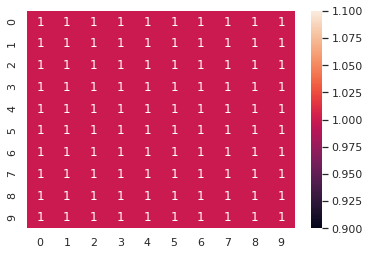

In [4]:
CU = cold_start(10)
sns.heatmap(CU,annot =True)

 if we select spin randomly up or down then it is called cold configuration

In [5]:
def hot_start(L): 
    U = [[0.0 for i in range(L)]for j in range(L)]
    for i in range(L):
          for j in range(L):
            t = random.sample([-1,1],1)
            U[i][j] = t[0]  
    return U 

Similarly we can plot thishot configuration as well.

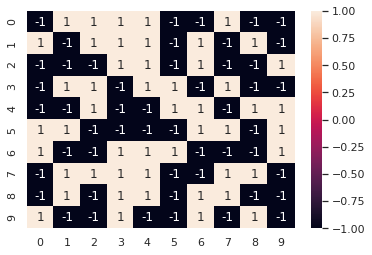

In [6]:
HU = hot_start(10)
sns.heatmap(HU,annot =True)

### Hamiltonian

Hamiltonian of  L by L lattice is given by

\\( H = - J \sum_{i\neq j} S_{i}S_{j} - \mu B \sum_{i} S_{i} \\)

In [7]:
def Hamiltonian(U,B):
    H = 0.0
    L = len(U)
    for i in range(L):
        for j in range(L):
                
            ni = 0;nj =0;
            if i == 0: ni = L
            if j == 0: nj = L
           
            H = H -  0.5*JJ*U[i][j]*(U[i][(j-1)+nj] \
                        + U[(i+1)%L][j] \
                        + U[i][(j+1)%L] \
                        + U[(i-1)+ni][j])  - mu*B*U[i][j]
    return H

One can check what are hamiltonian for hot and cold start:

In [8]:
Hamiltonian(CU, B=1.0)

-300.0

In [9]:
Hamiltonian(HU, B=0)

24.0

### Mangnetization

One can calculate magnetization by simply taking average over all spins:

In [10]:
def magnetization(U):
    return np.array(U).sum()/float(len(U) * len(U))       

In [11]:
magnetization(HU)

0.0

In [12]:
magnetization(CU)

1.0

### Spin Flipper

In [13]:
def ld(k,L):
    if k == 0:
        return L
    else: return 0

In [14]:
def spin_flipper(U,B):
        L = len(U)
        
        i = random.randint(0, L-1) 
        j = random.randint(0, L-1)
       
        
            
        U[i][j] = -U[i][j]
       
        
        dH =  -2.0*JJ*U[i][j]*(U[i][(j-1)+ld(j,L)] \
                            + U[(i+1)%L][j] \
                            + U[i][(j+1)%L] \
                            + U[(i-1)+ld(i,L)][j])  - 2*mu*B*U[i][j]
        #dH=Hnew-Hold
        return U,dH,i,j 

In [15]:



def Thermalization(U,T,nrun,B) :
    M = [0.0 for k in range(nrun)]
    irun = 0       
    
    HH = [0.0 for k in range(nrun)]
       
    while irun < nrun:
        V = U
        w = magnetization(U)
        h = Hamiltonian(U,B)
                    
        U,dH,p,q = spin_flipper(U,B)
                   
        if dH < 0:
            M[irun] = magnetization(U)
            HH[irun] = Hamiltonian(U,B)
        else:
            frac = math.exp(-dH/(Kb*T))
            b = random.uniform(0.0,1.0)
                            
            if  b < frac:
                M[irun] = magnetization(U)
                HH[irun] = Hamiltonian(U,B)
            else:
                U[p][q] = -U[p][q]
                M[irun] = w 
                HH[irun] = h
        irun = irun +1
    return M,U,HH 



In [22]:
L = 3
nrun = 10000
Tn = 100
avm = []
stdh = []
KT = []
B=0
for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = hot_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))

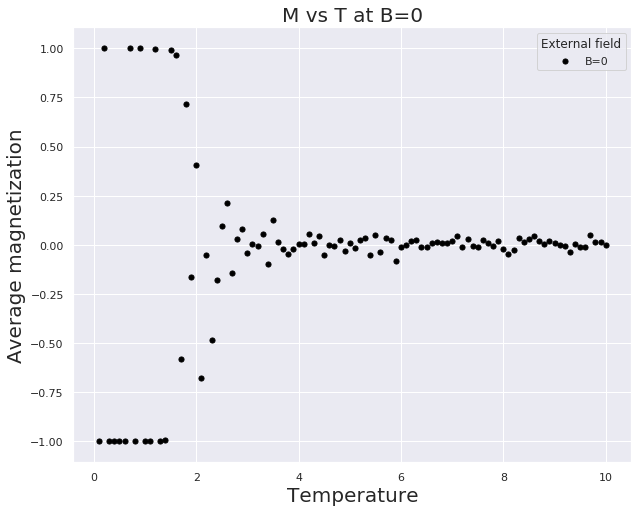

In [23]:
plt.figure(figsize = [10,8])
plt.title('M vs T at B=0',fontsize=20 )

plt.scatter(KT,avm,color="black",s=26,label="B=0")
plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Average magnetization",fontsize='20')
plt.legend(title="External field")
plt.show()

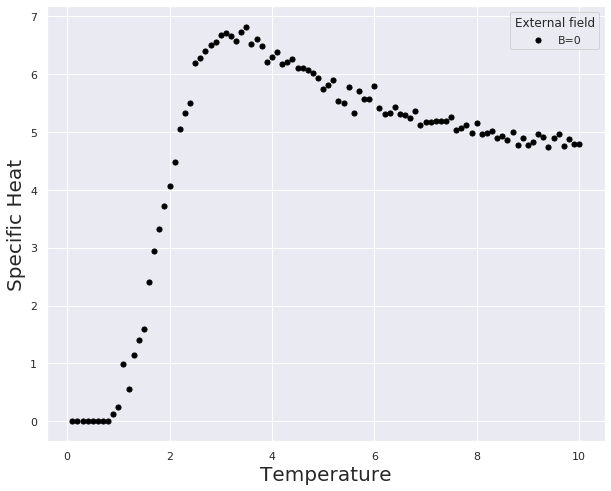

In [24]:
plt.figure(figsize = [10,8])
plt.scatter(KT,stdh,color="black",s=26,label="B=0")
plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat",fontsize='20')
plt.legend(title="External field")
plt.show()

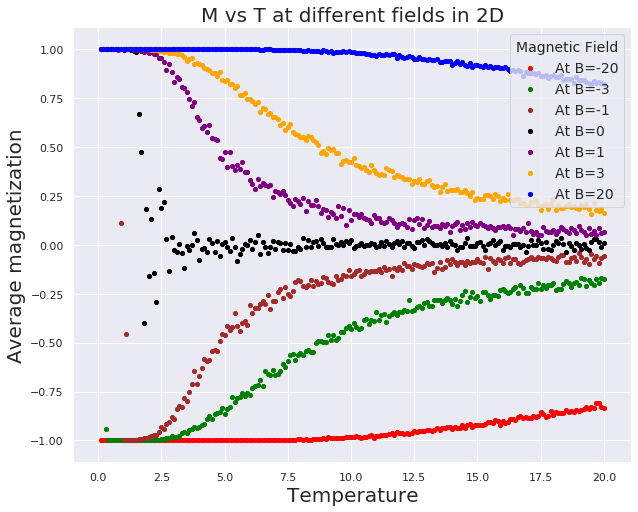

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize = [10,8])

plt.title('M vs T at different fields in 2D',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [-20,-3,-1,0,1,3,20]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 200
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,avm,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Average magnetization",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/2dphase.jpg')

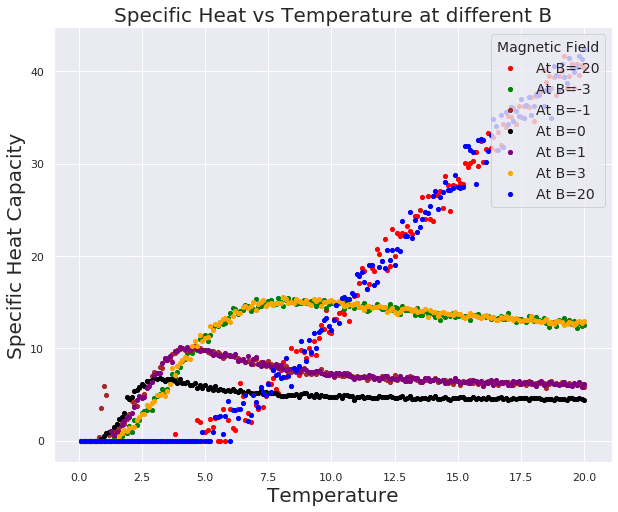

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize = [10,8])

plt.title('Specific Heat vs Temperature at different B',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [-20,-3,-1,0,1,3,20]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 200
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat Capacity",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/2dcv.jpg')

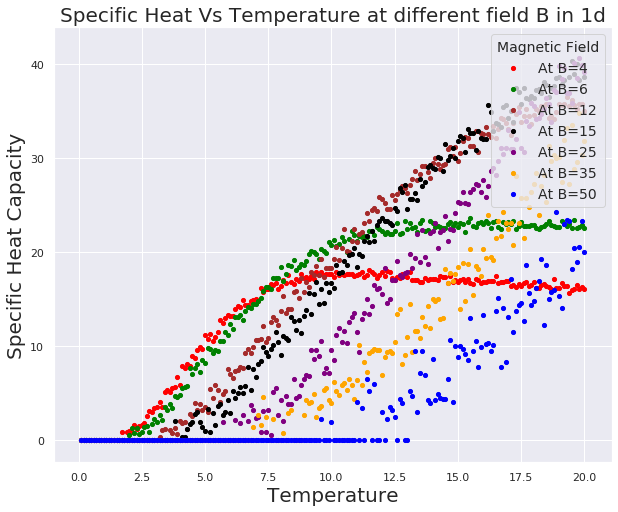

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize = [10,8])

plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [4,6,12,15, 25,35,50]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 200
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat Capacity",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/2dhighTcv.jpg')

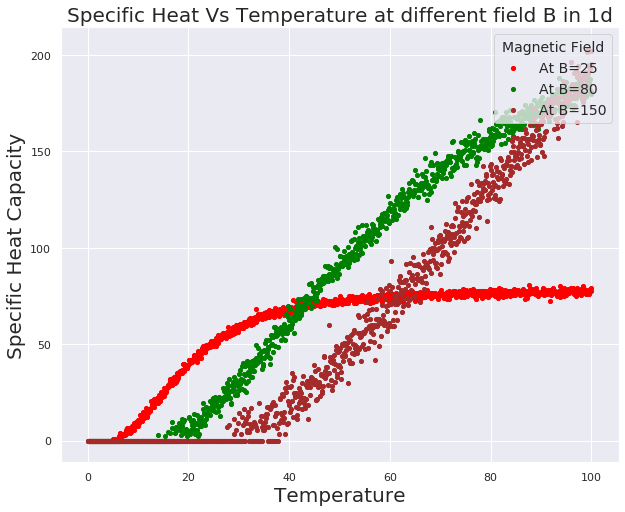

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize = [10,8])

plt.title('Specific Heat Vs Temperature at different field B in 1d',fontsize=20 )
C=["red","green","brown","black","purple","orange","blue"]
l=0
for B in [25,80,150]:
    colr=C[l]
    L = 3
    nrun = 10000
    Tn = 1000
    avm = []
    stdh = []
    KT = []
    
    for t in range(1,Tn+1):
        T = 0.1*t
        KT.append(T)
        U = cold_start(L)
        M,U,HH = Thermalization(U,T,nrun,B)
        nM = M[1000:nrun-1]
        nH = HH[1000:nrun-1]
        stdh.append(np.std(nH))
        avm.append(np.mean(nM))
    plt.scatter(KT,stdh,s=17,c=colr,label=('At B={}'.format(B)))
    l=l+1

plt.xlabel("Temperature",fontsize='20')
plt.ylabel("Specific Heat Capacity",fontsize='20')
plt.legend(title="Magnetic Field",title_fontsize=14,prop={"size":14},loc=1)
plt.show()
plt.savefig('/home/hari/Desktop/Geomag/2dcv.jpg')

#### Effect of Lattice  Size

### References

1. http://micro.stanford.edu/~caiwei/me334/Chap12_Ising_Model_v04.pdf
2. http://physics.drexel.edu/~valliere/PHYS305/Monte_Carlo/Monte_Carlo_story/node12.html
3. https://www.ibiblio.org/e-notes/Perc/ising.htm
4. https://arxiv.org/abs/2002.00615
5. http://farside.ph.utexas.edu/teaching/329/lectures/node110.html